<a href="https://colab.research.google.com/github/KAMRUZZAMAN-RUSSEL/ML/blob/main/Question16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RBF Kernel Matrix for First 3 Samples (gamma=0.1):
[[1.0e+00 0.0e+00 2.1e-09]
 [0.0e+00 1.0e+00 0.0e+00]
 [2.1e-09 0.0e+00 1.0e+00]]


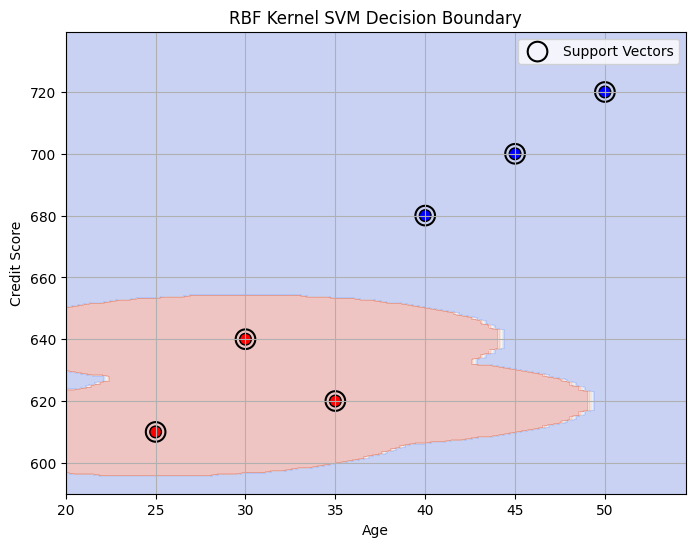

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics.pairwise import rbf_kernel

# Step 1: Define training data (Age, CreditScore, RiskClass)
X = np.array([
    [25, 610],  # x1
    [30, 640],  # x2
    [35, 620],  # x3
    [40, 680],
    [45, 700],
    [50, 720]
])
y = np.array([1, 1, 1, 0, 0, 0])  # 1 = Low Risk, 0 = High Risk

# Step 2: Train Kernel SVM with RBF
svm_rbf = SVC(kernel='rbf', gamma=0.1)
svm_rbf.fit(X, y)

# Step 3: Calculate RBF kernel matrix for first 3 samples
X3 = X[:3]
gamma = 0.1
K_matrix = rbf_kernel(X3, X3, gamma=gamma)

print("RBF Kernel Matrix for First 3 Samples (gamma=0.1):")
print(np.round(K_matrix, decimals=10))

# Step 4: Plot decision boundary
def plot_rbf_svm(model, X, y):
    plt.figure(figsize=(8, 6))
    h = 0.5
    x_min, x_max = X[:, 0].min() - 5, X[:, 0].max() + 5
    y_min, y_max = X[:, 1].min() - 20, X[:, 1].max() + 20
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict over grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=70, edgecolors='k')
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=200, facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')

    plt.xlabel("Age")
    plt.ylabel("Credit Score")
    plt.title("RBF Kernel SVM Decision Boundary")
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualize
plot_rbf_svm(svm_rbf, X, y)
